In [131]:
# pip install pandas

In [132]:
# pip install bs4

In [133]:
import pandas as pd

## get html

In [134]:
from bs4 import BeautifulSoup
import requests

# Fetch the webpage content
url = "https://www.nytimes.com/interactive/2024/dining/best-nyc-sandwiches.html"  # Replace with the actual URL
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")


In [135]:
# soup

## get `restaurants`, `sandwhich_names`, `addresses`

In [136]:

# Find all elements with class 'restaurant-name'
restaurants = [tag.text.strip() for tag in soup.find_all(class_="restaurant-name")]
sandwich_names = [tag.text.strip() for tag in soup.find_all(class_="sandwich-name")]
addresses = [tag.text.strip() for tag in soup.find_all(class_="metadata svelte-1w102ch")]
text = [tag.text.strip() for tag in soup.find_all(class_="g-text svelte-1w102ch")]
# images = [tag.text.strip() for tag in soup.find_all(class_="g-image svelte-z1ymna")]


In [137]:
print(len(restaurants))
print(len(sandwich_names))
print(len(text))

# we know that "local bodega is on there"
print(len(addresses))

57
57
57
56


In [138]:
# text

i know that "your local bodega" is messed up

In [139]:
restaurants[:1], sandwich_names[:1], addresses[:1], text[:1]

(['Your nearest bodega'],
 ['Bacon, egg and cheese'],
 ['178 East Seventh Street (Avenue B), $13, candbnyc.com'],
 ['In New York City, there is no single bacon, egg and cheese to rule them all. Whichever B.E.C. you’re eating in that moment is the best one. You dig into one as a means to start your day or to battle a hangover or to simply fulfill a craving for the most satisfying combination of ingredients known to man. To love the B.E.C. is to exist on a continuum of past, present and future bacon, egg and cheeses — all of them just around the corner or down the block from wherever you are right now. NIKITA RICHARDSON'])

In [140]:
# remove the first element of restaurants and sandwich_names
restaurants = restaurants[1:]
sandwich_names = sandwich_names[1:]
text = text[1:]

In [141]:
restaurants[:1], sandwich_names[:1], addresses[:1], text[:1]

(['C&B'],
 ['Chorizo egg sandwich'],
 ['178 East Seventh Street (Avenue B), $13, candbnyc.com'],
 ['Many people wouldn’t guess that C & B, by the looks of it, serves some of the finest sandwiches in the city. Ali Sahin’s tiny cafe has been located for nearly a decade on the south side of Tompkins Square Park in the East Village, serving breakfast sandwiches that exemplify why New Yorkers love breakfast sandwiches: they’re simple as can be, but every component is on point. Lining up for a weekend breakfast sandwich there feels a little like being at a model casting — one wonders if the name is a play on “see and be seen” — but ordering well is a great equalizer: a fat, rich chorizo patty straight off the griddle and wobbly scrambled eggs, all piled high on an housemade roll to soak up the sausage’s spiced fat. BECKY HUGHES'])

In [142]:
print(len(restaurants))
print(len(sandwich_names))

# we know that "local bodega is on there"
print(len(addresses))

56
56
56


#### make it a df

In [13]:
sand_dict = {'restaurant': restaurants, 'sandwich': sandwich_names, 'address': addresses, 'text': text}
sand_df = pd.DataFrame(sand_dict)

In [191]:
sand_df

,restaurant,sandwich,address,text,website,clean_address,price,image
0,C&B,Chorizo egg sandwich,"178 East Seventh Street (Avenue B), $13, candb...","Many people wouldn’t guess that C & B, by the ...",candbnyc.com,178 East Seventh Street (Avenue B),13,https://static01.nytimes.com/newsgraphics/2024...
1,Radio Bakery,Smoked salmon sandwich,"135 India Street (Manhattan Avenue), $15, radi...",New York is no stranger to smoked salmon — we’...,radiobakery.nyc,135 India Street (Manhattan Avenue),15,https://static01.nytimes.com/newsgraphics/2024...
2,Edith’s,BEC&L,"495 Lorimer Street (Powers Street), $14, edith...",Elyssa Heller is a pandemic pop-up success sto...,edithsbk.com,495 Lorimer Street (Powers Street),14,https://static01.nytimes.com/newsgraphics/2024...
3,Daily Provisions,The Lumberjack,"Multiple locations, $12, dailyprovisionsnyc.com",So many portmanteau foods can go horribly wron...,dailyprovisionsnyc.com,Multiple locations,12,https://static01.nytimes.com/newsgraphics/2024...
4,Shelsky’s Brooklyn Bagels,The Newhouse,"453 Fourth Avenue (10th Street), $18, shelskys...",Bialys and sable can seem like afterthoughts o...,shelskys.com,453 Fourth Avenue (10th Street),18,https://static01.nytimes.com/newsgraphics/2024...
5,Little Egg,Egg katsu sando,"657 Washington Avenue (St. Marks Avenue), $17,...",We’re living in a golden age of katsu sandos i...,eggrestaurant.com,657 Washington Avenue (St. Marks Avenue),17,https://static01.nytimes.com/newsgraphics/2024...
6,Kennedy International Airport Terminal 4,Shake Shack breakfast sandwich,"Kennedy International Airport, Terminal 4, $5,...",Few people head to the airport for an early-mo...,shakeshack.com/location/jfk-airport-nyc,Kennedy International Airport,5,https://static01.nytimes.com/newsgraphics/2024...
7,Faicco’s Italian Specialties,The Italian,"260 Bleecker Street (Leroy Street), $22, no we...","In 1998, Eddie Faicco, the fourth-generation o...",no website,260 Bleecker Street (Leroy Street),22,bad
8,Mama’s Too!,Chicken Parm hero,"Multiple locations, $20, mamastoo.com",Frank Tuttolomondo grew up in the Upper West S...,mamastoo.com,Multiple locations,20,https://static01.nytimes.com/newsgraphics/2024...
9,Casa Della Mozzarella,The Casa,"604 East 187th Street (Arthur Avenue), $9, ins...","At just 31 years old, Casa Della Mozzarella is...",instagram.com/casadellamozzarella,604 East 187th Street (Arthur Avenue),9,https://static01.nytimes.com/newsgraphics/2024...


## i need to parse
- '178 East Seventh Street (Avenue B), $13, candbnyc.com'
    - price 
    - candbnyc.com 

In [192]:
# Split the string by commas and get the last element
sand_df['website'] = sand_df['address'].str.split(',').str[-1].str.strip()
sand_df['clean_address'] = sand_df['address'].str.split(',').str[0]

In [193]:
sand_df

,restaurant,sandwich,address,text,website,clean_address,price,image
0,C&B,Chorizo egg sandwich,"178 East Seventh Street (Avenue B), $13, candb...","Many people wouldn’t guess that C & B, by the ...",candbnyc.com,178 East Seventh Street (Avenue B),13,https://static01.nytimes.com/newsgraphics/2024...
1,Radio Bakery,Smoked salmon sandwich,"135 India Street (Manhattan Avenue), $15, radi...",New York is no stranger to smoked salmon — we’...,radiobakery.nyc,135 India Street (Manhattan Avenue),15,https://static01.nytimes.com/newsgraphics/2024...
2,Edith’s,BEC&L,"495 Lorimer Street (Powers Street), $14, edith...",Elyssa Heller is a pandemic pop-up success sto...,edithsbk.com,495 Lorimer Street (Powers Street),14,https://static01.nytimes.com/newsgraphics/2024...
3,Daily Provisions,The Lumberjack,"Multiple locations, $12, dailyprovisionsnyc.com",So many portmanteau foods can go horribly wron...,dailyprovisionsnyc.com,Multiple locations,12,https://static01.nytimes.com/newsgraphics/2024...
4,Shelsky’s Brooklyn Bagels,The Newhouse,"453 Fourth Avenue (10th Street), $18, shelskys...",Bialys and sable can seem like afterthoughts o...,shelskys.com,453 Fourth Avenue (10th Street),18,https://static01.nytimes.com/newsgraphics/2024...
5,Little Egg,Egg katsu sando,"657 Washington Avenue (St. Marks Avenue), $17,...",We’re living in a golden age of katsu sandos i...,eggrestaurant.com,657 Washington Avenue (St. Marks Avenue),17,https://static01.nytimes.com/newsgraphics/2024...
6,Kennedy International Airport Terminal 4,Shake Shack breakfast sandwich,"Kennedy International Airport, Terminal 4, $5,...",Few people head to the airport for an early-mo...,shakeshack.com/location/jfk-airport-nyc,Kennedy International Airport,5,https://static01.nytimes.com/newsgraphics/2024...
7,Faicco’s Italian Specialties,The Italian,"260 Bleecker Street (Leroy Street), $22, no we...","In 1998, Eddie Faicco, the fourth-generation o...",no website,260 Bleecker Street (Leroy Street),22,bad
8,Mama’s Too!,Chicken Parm hero,"Multiple locations, $20, mamastoo.com",Frank Tuttolomondo grew up in the Upper West S...,mamastoo.com,Multiple locations,20,https://static01.nytimes.com/newsgraphics/2024...
9,Casa Della Mozzarella,The Casa,"604 East 187th Street (Arthur Avenue), $9, ins...","At just 31 years old, Casa Della Mozzarella is...",instagram.com/casadellamozzarella,604 East 187th Street (Arthur Avenue),9,https://static01.nytimes.com/newsgraphics/2024...


In [194]:
# sand_df['price'] = sand_df['address'].str.split(',').str[1].str.strip().replace({'\$': ''}, regex=True)
# sand_df['website'] = sand_df['address'].str.split(',').str[2].str.strip()``, regex=True)
# sand_df.to_csv('sandwiches.csv', index=False)

In [195]:
import pandas as pd
import re

# Function to extract the last valid price
def extract_price(text):
    matches = re.findall(r'\$(\d{1,2})\b', text)  # Ensure it's a standalone number
    return int(matches[-1]) if matches else None  # Convert to int, not float

# Apply function
sand_df['price'] = sand_df['address'].apply(extract_price)


In [196]:
sand_df

,restaurant,sandwich,address,text,website,clean_address,price,image
0,C&B,Chorizo egg sandwich,"178 East Seventh Street (Avenue B), $13, candb...","Many people wouldn’t guess that C & B, by the ...",candbnyc.com,178 East Seventh Street (Avenue B),13,https://static01.nytimes.com/newsgraphics/2024...
1,Radio Bakery,Smoked salmon sandwich,"135 India Street (Manhattan Avenue), $15, radi...",New York is no stranger to smoked salmon — we’...,radiobakery.nyc,135 India Street (Manhattan Avenue),15,https://static01.nytimes.com/newsgraphics/2024...
2,Edith’s,BEC&L,"495 Lorimer Street (Powers Street), $14, edith...",Elyssa Heller is a pandemic pop-up success sto...,edithsbk.com,495 Lorimer Street (Powers Street),14,https://static01.nytimes.com/newsgraphics/2024...
3,Daily Provisions,The Lumberjack,"Multiple locations, $12, dailyprovisionsnyc.com",So many portmanteau foods can go horribly wron...,dailyprovisionsnyc.com,Multiple locations,12,https://static01.nytimes.com/newsgraphics/2024...
4,Shelsky’s Brooklyn Bagels,The Newhouse,"453 Fourth Avenue (10th Street), $18, shelskys...",Bialys and sable can seem like afterthoughts o...,shelskys.com,453 Fourth Avenue (10th Street),18,https://static01.nytimes.com/newsgraphics/2024...
5,Little Egg,Egg katsu sando,"657 Washington Avenue (St. Marks Avenue), $17,...",We’re living in a golden age of katsu sandos i...,eggrestaurant.com,657 Washington Avenue (St. Marks Avenue),17,https://static01.nytimes.com/newsgraphics/2024...
6,Kennedy International Airport Terminal 4,Shake Shack breakfast sandwich,"Kennedy International Airport, Terminal 4, $5,...",Few people head to the airport for an early-mo...,shakeshack.com/location/jfk-airport-nyc,Kennedy International Airport,5,https://static01.nytimes.com/newsgraphics/2024...
7,Faicco’s Italian Specialties,The Italian,"260 Bleecker Street (Leroy Street), $22, no we...","In 1998, Eddie Faicco, the fourth-generation o...",no website,260 Bleecker Street (Leroy Street),22,bad
8,Mama’s Too!,Chicken Parm hero,"Multiple locations, $20, mamastoo.com",Frank Tuttolomondo grew up in the Upper West S...,mamastoo.com,Multiple locations,20,https://static01.nytimes.com/newsgraphics/2024...
9,Casa Della Mozzarella,The Casa,"604 East 187th Street (Arthur Avenue), $9, ins...","At just 31 years old, Casa Della Mozzarella is...",instagram.com/casadellamozzarella,604 East 187th Street (Arthur Avenue),9,https://static01.nytimes.com/newsgraphics/2024...


In [197]:
# pip install matplotlib

In [198]:
import matplotlib.pyplot as plt

<Axes: xlabel='price'>

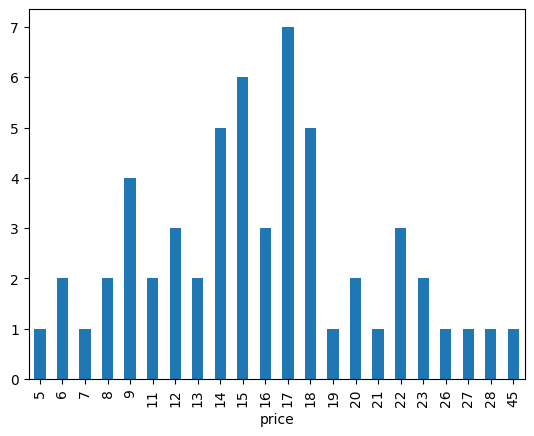

In [199]:
sand_df['price'].value_counts().sort_index().plot(kind='bar')

In [200]:
# sand_df['website'].value_counts()  

## get the images

In [212]:

# Find all image tags
images = soup.find_all("img")

# Filter images that contain "sandwich" but NOT "_big_assets"
sandwich_images = [
    img["src"] for img in images 
    if "sandwich" in img.get("src", "").lower() and "_big_assets" not in img.get("src", "").lower()
]

big_sandwich_images = [
    img["src"] for img in images 
    if "sandwich" in img.get("src", "").lower() and "_big_assets" in img.get("src", "").lower()
]


# print(len(restaurants))
# print(len(sandwich_names))

# your locale bodega . . .
# print(len(addresses))

print(len(images))
print(len(sandwich_images))
print(len(big_sandwich_images))


72
48
24


In [215]:
big_sandwich_images_unique = set(big_sandwich_images)

# big_sandwich_images_unique

In [217]:
len(big_sandwich_images_unique)

18

In [218]:
big_filtered_urls = set([url for url in image_urls if url.endswith("-1.png")])
big_filtered_urls

{'https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_big_assets/breakfast-1.png',
 'https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_big_assets/datz-1.png',
 'https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_big_assets/deli-1.png',
 'https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_big_assets/faicco-1.png',
 'https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_big_assets/pastrami-1.png',
 'https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_big_assets/pho-1.png',
 'https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_big_assets/russ-1.png',
 'https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_big_assets/salty-1.png',
 'https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_big_assets/veg-1.png'}

In [219]:
len(big_filtered_urls)

9

In [220]:
len(big_filtered_urls) + len(sandwich_images)

57

## i don't want the bodega image

In [221]:
big_filtered_urls_final = {url for url in big_filtered_urls if 'breakfast' not in url}


In [222]:
len(big_filtered_urls_final)

8

In [225]:
len(big_filtered_urls_final) + len(sandwich_images)

56

In [226]:
big_filtered_urls_final

{'https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_big_assets/datz-1.png',
 'https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_big_assets/deli-1.png',
 'https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_big_assets/faicco-1.png',
 'https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_big_assets/pastrami-1.png',
 'https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_big_assets/pho-1.png',
 'https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_big_assets/russ-1.png',
 'https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_big_assets/salty-1.png',
 'https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_big_assets/veg-1.png'}

In [186]:
# Faicco’s Italian Specialties, 'https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_big_assets/faicco-1.png',
# Baby Blues Luncheonette, 'https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_big_assets/veg-1.png'
# Katz’s Delicatessen, 'https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_big_assets/pastrami-1.png',
# Russ & Daughters Cafe, 'https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_big_assets/russ-1.png',
# Anthony’s Paninoteca, 'https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_big_assets/deli-1.png',
# Salty Lunch Lady’s Little Luncheonette, 'https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_big_assets/salty-1.png',
# Little Kirin, 'https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_big_assets/pho-1.png',
# Datz Deli, 'https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_big_assets/datz-1.png', 

In [230]:
sandwich_spots = {
    "Faicco’s Italian Specialties": "https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_big_assets/faicco-1.png",
    "Baby Blues Luncheonette": "https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_big_assets/veg-1.png",
    "Katz’s Delicatessen": "https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_big_assets/pastrami-1.png",
    "Russ & Daughters Cafe": "https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_big_assets/russ-1.png",
    "Anthony’s Paninoteca": "https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_big_assets/deli-1.png",
    "Salty Lunch Lady’s Little Luncheonette": "https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_big_assets/salty-1.png",
    "Little Kirin": "https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_big_assets/pho-1.png",
    "Datz Deli": "https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_big_assets/datz-1.png"
}

big_url_df = pd.DataFrame(sandwich_spots.items(), columns=["restaurant", "big_url_image"])


In [231]:
big_url_df

,restaurant,big_url_image
0,Faicco’s Italian Specialties,https://static01.nytimes.com/newsgraphics/2024...
1,Baby Blues Luncheonette,https://static01.nytimes.com/newsgraphics/2024...
2,Katz’s Delicatessen,https://static01.nytimes.com/newsgraphics/2024...
3,Russ & Daughters Cafe,https://static01.nytimes.com/newsgraphics/2024...
4,Anthony’s Paninoteca,https://static01.nytimes.com/newsgraphics/2024...
5,Salty Lunch Lady’s Little Luncheonette,https://static01.nytimes.com/newsgraphics/2024...
6,Little Kirin,https://static01.nytimes.com/newsgraphics/2024...
7,Datz Deli,https://static01.nytimes.com/newsgraphics/2024...


In [233]:
sand_df_full = pd.merge(sand_df, big_url_df, on='restaurant', how='left')

In [234]:
sand_df_full

,restaurant,sandwich,address,text,website,clean_address,price,image,big_url_image
0,C&B,Chorizo egg sandwich,"178 East Seventh Street (Avenue B), $13, candb...","Many people wouldn’t guess that C & B, by the ...",candbnyc.com,178 East Seventh Street (Avenue B),13,https://static01.nytimes.com/newsgraphics/2024...,NaN
1,Radio Bakery,Smoked salmon sandwich,"135 India Street (Manhattan Avenue), $15, radi...",New York is no stranger to smoked salmon — we’...,radiobakery.nyc,135 India Street (Manhattan Avenue),15,https://static01.nytimes.com/newsgraphics/2024...,NaN
2,Edith’s,BEC&L,"495 Lorimer Street (Powers Street), $14, edith...",Elyssa Heller is a pandemic pop-up success sto...,edithsbk.com,495 Lorimer Street (Powers Street),14,https://static01.nytimes.com/newsgraphics/2024...,NaN
3,Daily Provisions,The Lumberjack,"Multiple locations, $12, dailyprovisionsnyc.com",So many portmanteau foods can go horribly wron...,dailyprovisionsnyc.com,Multiple locations,12,https://static01.nytimes.com/newsgraphics/2024...,NaN
4,Shelsky’s Brooklyn Bagels,The Newhouse,"453 Fourth Avenue (10th Street), $18, shelskys...",Bialys and sable can seem like afterthoughts o...,shelskys.com,453 Fourth Avenue (10th Street),18,https://static01.nytimes.com/newsgraphics/2024...,NaN
5,Little Egg,Egg katsu sando,"657 Washington Avenue (St. Marks Avenue), $17,...",We’re living in a golden age of katsu sandos i...,eggrestaurant.com,657 Washington Avenue (St. Marks Avenue),17,https://static01.nytimes.com/newsgraphics/2024...,NaN
6,Kennedy International Airport Terminal 4,Shake Shack breakfast sandwich,"Kennedy International Airport, Terminal 4, $5,...",Few people head to the airport for an early-mo...,shakeshack.com/location/jfk-airport-nyc,Kennedy International Airport,5,https://static01.nytimes.com/newsgraphics/2024...,NaN
7,Faicco’s Italian Specialties,The Italian,"260 Bleecker Street (Leroy Street), $22, no we...","In 1998, Eddie Faicco, the fourth-generation o...",no website,260 Bleecker Street (Leroy Street),22,bad,https://static01.nytimes.com/newsgraphics/2024...
8,Mama’s Too!,Chicken Parm hero,"Multiple locations, $20, mamastoo.com",Frank Tuttolomondo grew up in the Upper West S...,mamastoo.com,Multiple locations,20,https://static01.nytimes.com/newsgraphics/2024...,NaN
9,Casa Della Mozzarella,The Casa,"604 East 187th Street (Arthur Avenue), $9, ins...","At just 31 years old, Casa Della Mozzarella is...",instagram.com/casadellamozzarella,604 East 187th Street (Arthur Avenue),9,https://static01.nytimes.com/newsgraphics/2024...,NaN


In [235]:
sand_df_full['image_final'] = np.where(
    sand_df_full['image'] == 'bad',
    sand_df_full['big_url_image'],
    sand_df_full['image']
)

In [236]:
sand_df_full.columns

Index(['restaurant', 'sandwich', 'address', 'text', 'website', 'clean_address',
       'price', 'image', 'big_url_image', 'image_final'],
      dtype='object')

In [290]:
# sand_df_full

In [239]:
# len(big_filtered_urls)

In [240]:
# len(set(big_filtered_urls))

In [238]:
# len(set(sandwich_images))

# big_sandwich_images

In [241]:
# bad

In [242]:
# image_urls

In [243]:

# bad_sandwich_images = [
#     img["src"] for img in images 
#     if "sandwich" in img.get("src", "").lower() and "_big_assets" in img.get("src", "").lower()
# ]


# # print(len(restaurants))
# # print(len(sandwich_names))

# # your locale bodega . . .
# # print(len(addresses))

# print(len(images))
# print(len(sandwich_images))
# print(len(bad_sandwich_images))


In [245]:

# if len(sandwich_images) + len(bad_sandwich_images) == len(images):
#     print("I got all the sandwiches!")
# else:
#     print("I still have sandwiches to find :(")


In [26]:
# no_pic = [
#     "The Italian",
#     "HLT",
#     "Pastrami on rye",
#     "Classic bagel and lox",
#     "Do It For Johnny",
#     "Dill Party",
#     "The pho sandwich",
#     "Oxtail Macpatty"
# ]

# len(no_pic)

8

In [246]:
# # Create a new column to store the image paths
# sand_df['image'] = ''

# # Initialize the index for sandwich_images
# image_index = 0

# # Loop through the DataFrame
# for index, row in sand_df.iterrows():
#     sandwich = row['sandwich']
#     if sandwich in no_pic:
#         print("bad")
#         print(sandwich)
#         sand_df.at[index, 'image'] = 'bad'
#     else:
#         if image_index < len(sandwich_images):
#             print(row['sandwich'])
#             print(image_index)
#             print(sandwich_images[image_index])
#             sand_df.at[index, 'image'] = sandwich_images[image_index]
#             image_index += 1

# # Print the updated DataFrame
# sand_df


In [28]:
# len(addresses)

In [29]:
# sandwich_images[-5:]


In [247]:
# sand_df[sand_df['image'] == 'bad']['restaurant']

In [30]:
# print(location_list)

## GEOCODE

In [31]:
# pip install dotenv

In [309]:
import os
from dotenv import load_dotenv

# Load .env file
load_dotenv()

# Get API key
google_maps_api_key = os.getenv("GOOGLE_MAPS_API_KEY")

# print(f"Your API key is: {api_key}")  # Avoid printing in production

In [250]:
# Base URL for Google Maps Geocoding API
base_url = 'https://maps.googleapis.com/maps/api/geocode/json?'

# Initialize an empty list to collect results
geocode_results = []

# Loop through the list of addresses
for sandwich, address, clean_address, restaurant in zip(
    sand_df_full['sandwich'], 
    sand_df_full['address'], 
    sand_df_full['clean_address'], 
    sand_df_full['restaurant']
):
    
    
    params = {
        'key': google_maps_api_key,
        'address': address
    }

    response = requests.get(base_url, params=params).json()

    if response['status'] == 'OK':
        geometry = response['results'][0]['geometry']
        lat = geometry['location']['lat']
        lng = geometry['location']['lng']
        google_address = response['results'][0]['formatted_address']
        
        geocode_results.append({
            "sandwich": sandwich,
            "address": address,
            "clean_address": clean_address,
            "google_address": google_address,
            "latitude": lat,
            "longitude": lng,
            "resp_stat": response['status'],
            "restaurant": restaurant
        })
    else:
        geocode_results.append({
            "sandwich": sandwich,
            "address": address,
            "clean_address": clean_address,
            "google_address": None,
            "latitude": None,
            "longitude": None,
            "resp_stat": response['status'],
            "restaurant": restaurant
        })

# Convert the results to a pandas DataFrame
geo_df = pd.DataFrame(geocode_results)


In [251]:
geo_df['resp_stat'].value_counts()

resp_stat
OK              46
ZERO_RESULTS    10
Name: count, dtype: int64

In [256]:
geo_df_ok = geo_df[geo_df['resp_stat'] == 'OK'].copy()

In [257]:
geo_df_ok.shape

(46, 8)

In [37]:
# 657 Washington Avenue (St. Marks Avenue), $17,...	NaN	NaN	ZERO_RESULTS

In [258]:
geo_df_ok

,sandwich,address,clean_address,google_address,latitude,longitude,resp_stat,restaurant
0,Chorizo egg sandwich,"178 East Seventh Street (Avenue B), $13, candb...",178 East Seventh Street (Avenue B),"178 E 7th St, New York, NY 10009, USA",40.725141,-73.981656,OK,C&B
1,Smoked salmon sandwich,"135 India Street (Manhattan Avenue), $15, radi...",135 India Street (Manhattan Avenue),"135 India St, Brooklyn, NY 11222, USA",40.732391,-73.955068,OK,Radio Bakery
2,BEC&L,"495 Lorimer Street (Powers Street), $14, edith...",495 Lorimer Street (Powers Street),"495 Lorimer St, Brooklyn, NY 11211, USA",40.711708,-73.949175,OK,Edith’s
4,The Newhouse,"453 Fourth Avenue (10th Street), $18, shelskys...",453 Fourth Avenue (10th Street),"453 Park Ave, New York, NY 10022, USA",40.761604,-73.970392,OK,Shelsky’s Brooklyn Bagels
6,Shake Shack breakfast sandwich,"Kennedy International Airport, Terminal 4, $5,...",Kennedy International Airport,"Terminal 4, Terminal 4 Departures Gate B37, Qu...",40.638134,-73.781193,OK,Kennedy International Airport Terminal 4
7,The Italian,"260 Bleecker Street (Leroy Street), $22, no we...",260 Bleecker Street (Leroy Street),"260 Bleecker St, New York, NY 10014, USA",40.731121,-74.003117,OK,Faicco’s Italian Specialties
9,The Casa,"604 East 187th Street (Arthur Avenue), $9, ins...",604 East 187th Street (Arthur Avenue),"604 E 187th St, Bronx, NY 10458, USA",40.855321,-73.887411,OK,Casa Della Mozzarella
10,"Egg, potato and cheese hero","379 Columbia Street (Luquer Street), $9, insta...",379 Columbia Street (Luquer Street),"379 Columbia St, Brooklyn, NY 11231, USA",40.678965,-74.005340,OK,Defonte’s Sandwich Shop
12,The SoHo,"4569 Amboy Road (Retford Avenue), $15, filonci...",4569 Amboy Road (Retford Avenue),"4569 Amboy Rd, Staten Island, NY 10312, USA",40.542536,-74.165476,OK,Filoncino Cafe
14,The Bomb,"33-12 23rd Avenue (33rd Street), $17, facebook...",33-12 23rd Avenue (33rd Street),"33-12 23rd Ave, Astoria, NY 11105, USA",40.773193,-73.911614,OK,"Sal, Kris and Charlie’s Deli"


In [259]:
geo_df_bad = geo_df[geo_df['resp_stat'] == 'ZERO_RESULTS'].copy()

In [260]:
geo_df_bad.shape

(10, 8)

In [261]:
geo_df_bad

,sandwich,address,clean_address,google_address,latitude,longitude,resp_stat,restaurant
3,The Lumberjack,"Multiple locations, $12, dailyprovisionsnyc.com",Multiple locations,None,NaN,NaN,ZERO_RESULTS,Daily Provisions
5,Egg katsu sando,"657 Washington Avenue (St. Marks Avenue), $17,...",657 Washington Avenue (St. Marks Avenue),None,NaN,NaN,ZERO_RESULTS,Little Egg
8,Chicken Parm hero,"Multiple locations, $20, mamastoo.com",Multiple locations,None,NaN,NaN,ZERO_RESULTS,Mama’s Too!
11,Uncle Rocco,"Multiple locations, $18, reginasgrocery.com",Multiple locations,None,NaN,NaN,ZERO_RESULTS,Regina’s Grocery
13,Michelangelo,"Multiple locations, $14, alidoronyc.com",Multiple locations,None,NaN,NaN,ZERO_RESULTS,Alidoro
16,Veg-Italian Sub,"Multiple locations, $16, courtstreetgrocers.com",Multiple locations,None,NaN,NaN,ZERO_RESULTS,Court Street Grocers
33,Chicken Caesar wrap,"Multiple locations, $15, milanomarketnyc.com",Multiple locations,None,NaN,NaN,ZERO_RESULTS,Milano Market
46,Spicy cumin lamb burger,"Multiple locations, $6, xianfoods.com",Multiple locations,None,NaN,NaN,ZERO_RESULTS,Xi’an Famous Foods
50,Oxtail Macpatty,"Multiple locations, $14, datzdeliny.com",Multiple locations,None,NaN,NaN,ZERO_RESULTS,Datz Deli
53,Lil’ Rowdy and Big Rowdy,"Multiple locations, $9 and $12, rowdyrooster.com",Multiple locations,None,NaN,NaN,ZERO_RESULTS,Rowdy Rooster


In [262]:
# df

i'm geocoding adresses in python and google maps api, any suggestions on how to handle this:

Multiple locations, $12, dailyprovisionsnyc.com

now the input here is a list of addresses all with a similar format


In [43]:
# pip install googlemaps


In [44]:
# pip install googlemaps

In [264]:
import re
import googlemaps 
 
gmaps = googlemaps.Client(key=google_maps_api_key)


# Initialize an empty list to collect results
geocode_results_bad = []

# Loop through the DataFrame
for index, row in geo_df_bad.iterrows():

    # Use Google Places API to find all locations for the business
    places_result = gmaps.places(query=row['restaurant'])

    # Extract place names and addresses
    locations = [(place['name'], place['formatted_address']) for place in places_result.get('results', [])]

    # Geocode each location
    for loc in locations:
        place_result = gmaps.geocode(loc[1])
        if place_result:
            geocode_results_bad.append({
                "google_address": loc[1],
                "address": row['address'],
                "restaurant": loc[0],
                "latitude": place_result[0]['geometry']['location']['lat'],
                "longitude": place_result[0]['geometry']['location']['lng'],
                "sandwich": row['sandwich']
            })


In [266]:
# Convert the results to a pandas DataFrame
geo_df_bad_full = pd.DataFrame(geocode_results_bad, columns=['google_address', 'address', 'restaurant', 'latitude', 'longitude', 'sandwich'])

In [267]:
geo_df_bad_full

,google_address,address,restaurant,latitude,longitude,sandwich
0,"225 Liberty St #253, New York, NY 10280, Unite...","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions - Brookfield Place,40.712619,-74.015439,The Lumberjack
1,"29 Bedford St, New York, NY 10014, United States","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions - West Village,40.729219,-74.003799,The Lumberjack
2,"103 E 19th St, New York, NY 10003, United States","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions - Union Square,40.737663,-73.987608,The Lumberjack
3,"151 Court St, Brooklyn, NY 11201, United States","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions - Cobble Hill,40.689008,-73.992525,The Lumberjack
4,"440 W 33rd St Suite 90, New York, NY 10001, Un...","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions - Manhattan West,40.752579,-73.998898,The Lumberjack
5,"30 Rockefeller Center Unit CO-03, New York, NY...","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions – Rockefeller Center,40.759375,-73.979973,The Lumberjack
6,"124 Bay St, Jersey City, NJ 07302, United States","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions,40.720799,-74.038470,The Lumberjack
7,"375 Amsterdam Ave, New York, NY 10024, United ...","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions - Upper West Side,40.782230,-73.978635,The Lumberjack
8,"1381 Madison Ave, New York, NY 10029, United S...","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions - Upper East Side,40.787312,-73.953878,The Lumberjack
9,"657 Washington Ave, Brooklyn, NY 11238, United...","657 Washington Avenue (St. Marks Avenue), $17,...",Little Egg,40.677707,-73.963527,Egg katsu sando


In [268]:
geo_df_bad_full['clean_address'] = geo_df_bad_full['google_address'].str.replace(', United States', '')


In [269]:
geo_df_bad_full

,google_address,address,restaurant,latitude,longitude,sandwich,clean_address
0,"225 Liberty St #253, New York, NY 10280, Unite...","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions - Brookfield Place,40.712619,-74.015439,The Lumberjack,"225 Liberty St #253, New York, NY 10280"
1,"29 Bedford St, New York, NY 10014, United States","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions - West Village,40.729219,-74.003799,The Lumberjack,"29 Bedford St, New York, NY 10014"
2,"103 E 19th St, New York, NY 10003, United States","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions - Union Square,40.737663,-73.987608,The Lumberjack,"103 E 19th St, New York, NY 10003"
3,"151 Court St, Brooklyn, NY 11201, United States","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions - Cobble Hill,40.689008,-73.992525,The Lumberjack,"151 Court St, Brooklyn, NY 11201"
4,"440 W 33rd St Suite 90, New York, NY 10001, Un...","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions - Manhattan West,40.752579,-73.998898,The Lumberjack,"440 W 33rd St Suite 90, New York, NY 10001"
5,"30 Rockefeller Center Unit CO-03, New York, NY...","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions – Rockefeller Center,40.759375,-73.979973,The Lumberjack,"30 Rockefeller Center Unit CO-03, New York, NY..."
6,"124 Bay St, Jersey City, NJ 07302, United States","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions,40.720799,-74.038470,The Lumberjack,"124 Bay St, Jersey City, NJ 07302"
7,"375 Amsterdam Ave, New York, NY 10024, United ...","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions - Upper West Side,40.782230,-73.978635,The Lumberjack,"375 Amsterdam Ave, New York, NY 10024"
8,"1381 Madison Ave, New York, NY 10029, United S...","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions - Upper East Side,40.787312,-73.953878,The Lumberjack,"1381 Madison Ave, New York, NY 10029"
9,"657 Washington Ave, Brooklyn, NY 11238, United...","657 Washington Avenue (St. Marks Avenue), $17,...",Little Egg,40.677707,-73.963527,Egg katsu sando,"657 Washington Ave, Brooklyn, NY 11238"


In [270]:
substrings_to_remove = [
    "Old Xi’an", 
    "Authentic Xi’an Flavor", 
    "Bites of Xi'an", 
    "Famous Sichuan", 
    "Bites of Xian", 
    "Union Market", 
    "Caputo's Fine Foods",
    "Union Market",
    "Willy Deli Grocery Corp"
]


geo_df_bad_full_filtered = geo_df_bad_full[~geo_df_bad_full['restaurant'].str.contains('|'.join(substrings_to_remove), regex=True)]


In [271]:
geo_df_bad_full_filtered.isna().sum()

google_address    0
address           0
restaurant        0
latitude          0
longitude         0
sandwich          0
clean_address     0
dtype: int64

In [272]:
geo_df_bad_full_filtered.head()

,google_address,address,restaurant,latitude,longitude,sandwich,clean_address
0,"225 Liberty St #253, New York, NY 10280, Unite...","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions - Brookfield Place,40.712619,-74.015439,The Lumberjack,"225 Liberty St #253, New York, NY 10280"
1,"29 Bedford St, New York, NY 10014, United States","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions - West Village,40.729219,-74.003799,The Lumberjack,"29 Bedford St, New York, NY 10014"
2,"103 E 19th St, New York, NY 10003, United States","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions - Union Square,40.737663,-73.987608,The Lumberjack,"103 E 19th St, New York, NY 10003"
3,"151 Court St, Brooklyn, NY 11201, United States","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions - Cobble Hill,40.689008,-73.992525,The Lumberjack,"151 Court St, Brooklyn, NY 11201"
4,"440 W 33rd St Suite 90, New York, NY 10001, Un...","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions - Manhattan West,40.752579,-73.998898,The Lumberjack,"440 W 33rd St Suite 90, New York, NY 10001"


In [273]:
geo_df_bad_full_filtered.columns

Index(['google_address', 'address', 'restaurant', 'latitude', 'longitude',
       'sandwich', 'clean_address'],
      dtype='object')

In [275]:
geo_df_ok.columns

Index(['sandwich', 'address', 'clean_address', 'google_address', 'latitude',
       'longitude', 'resp_stat', 'restaurant'],
      dtype='object')

In [280]:
# geo_df_ok

In [278]:
# sand_df.columns

In [281]:
geo_df_bad_full_filtered.shape[0] + geo_df_ok.shape[0]

91

In [283]:
# geo_df_bad_full_filtered

In [284]:
# geo_df_filtered.shape

In [286]:
geo_df_ok.columns

Index(['sandwich', 'address', 'clean_address', 'google_address', 'latitude',
       'longitude', 'resp_stat', 'restaurant'],
      dtype='object')

In [59]:
cols_to_keep = ['sandwich', 'address', 'clean_address', 'latitude', 'longitude', 'restaurant']

In [287]:
geo_cat_df = pd.concat([geo_df_ok[cols_to_keep], geo_df_bad_full_filtered[cols_to_keep]])

In [288]:
geo_cat_df.shape

(91, 6)

In [289]:
geo_cat_df

,sandwich,address,clean_address,latitude,longitude,restaurant
0,Chorizo egg sandwich,"178 East Seventh Street (Avenue B), $13, candb...",178 East Seventh Street (Avenue B),40.725141,-73.981656,C&B
1,Smoked salmon sandwich,"135 India Street (Manhattan Avenue), $15, radi...",135 India Street (Manhattan Avenue),40.732391,-73.955068,Radio Bakery
2,BEC&L,"495 Lorimer Street (Powers Street), $14, edith...",495 Lorimer Street (Powers Street),40.711708,-73.949175,Edith’s
4,The Newhouse,"453 Fourth Avenue (10th Street), $18, shelskys...",453 Fourth Avenue (10th Street),40.761604,-73.970392,Shelsky’s Brooklyn Bagels
6,Shake Shack breakfast sandwich,"Kennedy International Airport, Terminal 4, $5,...",Kennedy International Airport,40.638134,-73.781193,Kennedy International Airport Terminal 4
...,...,...,...,...,...,...
43,Spicy cumin lamb burger,"Multiple locations, $6, xianfoods.com","309 Amsterdam Ave, New York, NY 10023",40.780120,-73.980185,Xi'an Famous Foods 西安名吃 | 74th&Amsterdam UWS
48,Oxtail Macpatty,"Multiple locations, $14, datzdeliny.com","69 Clinton St, New York, NY 10002",40.719363,-73.985112,Datz Deli
49,Oxtail Macpatty,"Multiple locations, $14, datzdeliny.com","245 W 46th St, New York, NY 10036",40.759641,-73.987011,Datz Deli
50,Oxtail Macpatty,"Multiple locations, $14, datzdeliny.com","190-01 Hollis Ave, Hollis, NY 11423",40.709609,-73.767578,Datz Deli


In [291]:
merged_df = geo_cat_df[[
    'sandwich',
    'latitude',
    'longitude',
    'clean_address',
    'restaurant'
]].merge(sand_df_full[[
    'sandwich', 
    'image_final', 
    'price', 
    'text',
    'website'
]], on='sandwich')

In [292]:
merged_df.shape

(91, 9)

In [293]:
merged_df.head()

,sandwich,latitude,longitude,clean_address,restaurant,image_final,price,text,website
0,Chorizo egg sandwich,40.725141,-73.981656,178 East Seventh Street (Avenue B),C&B,https://static01.nytimes.com/newsgraphics/2024...,13,"Many people wouldn’t guess that C & B, by the ...",candbnyc.com
1,Smoked salmon sandwich,40.732391,-73.955068,135 India Street (Manhattan Avenue),Radio Bakery,https://static01.nytimes.com/newsgraphics/2024...,15,New York is no stranger to smoked salmon — we’...,radiobakery.nyc
2,BEC&L,40.711708,-73.949175,495 Lorimer Street (Powers Street),Edith’s,https://static01.nytimes.com/newsgraphics/2024...,14,Elyssa Heller is a pandemic pop-up success sto...,edithsbk.com
3,The Newhouse,40.761604,-73.970392,453 Fourth Avenue (10th Street),Shelsky’s Brooklyn Bagels,https://static01.nytimes.com/newsgraphics/2024...,18,Bialys and sable can seem like afterthoughts o...,shelskys.com
4,Shake Shack breakfast sandwich,40.638134,-73.781193,Kennedy International Airport,Kennedy International Airport Terminal 4,https://static01.nytimes.com/newsgraphics/2024...,5,Few people head to the airport for an early-mo...,shakeshack.com/location/jfk-airport-nyc


In [294]:
merged_df.isna().sum()

sandwich         0
latitude         0
longitude        0
clean_address    0
restaurant       0
image_final      0
price            0
text             0
website          0
dtype: int64

In [295]:
# is_unique = merged_df.duplicated(subset=['sandwich', 'clean_address']).any()


In [296]:
# is_unique

np.False_

In [66]:
# sand_df.head()

In [67]:
# geo_df.head()

In [68]:
# geo_df_filtered = geo_df[geo_df['resp_stat'] != 'ZERO_RESULTS'].copy()

In [69]:
# geo_df_filtered.shape

In [70]:
# geo_df_filtered.columns

In [71]:
# geo_df_filtered.head()

In [72]:
# sand_df.head() 

In [73]:
# sand_df = sand_df[['restaurant', 'sandwich', 'price', 'website', 'clean_address', 'image']].copy()

In [74]:
# sand_df.columns

In [75]:
# sand_df.head()

In [76]:
# sand_df['sandwich'].nunique()

In [77]:
# geo_df_filtered.head()

In [78]:
# merged_df = sand_df.merge(geo_df_filtered[['sandwich', 'price']], on='sandwich', how='left')

In [79]:
# filtered_geo_df_full

In [80]:
# filtered_geo_df

In [81]:
# geo_df = geo_df[~geo_df['sandwich'].isin(filtered_df['sandwich'])]

In [82]:
# geo_df.isna().sum()

In [83]:
# geo_df.shape

In [84]:
# full_df = pd.concat([geo_df, filtered_geo_df_full], ignore_index=True)

In [85]:
# full_df.isna().sum()

In [86]:
# full_df.tail()

In [87]:
# full_df.shape

In [88]:
# full_df.drop(columns=['resp_stat'], inplace=True)

In [89]:
# full_df

In [90]:
# merged_df = full_df.merge(sand_df[['sandwich', 'image']], on='sandwich', how='left')


In [91]:
# merged_df.tail()

## i need to get the df to look like this, then write back to json, then paste in the html

In [297]:
merged_df.columns

Index(['sandwich', 'latitude', 'longitude', 'clean_address', 'restaurant',
       'image_final', 'price', 'text', 'website'],
      dtype='object')

In [300]:
locations = []
for index, row in merged_df.iterrows():
    location = {
        'name': row['restaurant'],
        'lat': row['latitude'],
        'lng': row['longitude'],
        'img': row['image_final'],
        'location': row['clean_address'],
        'sandwich': row['sandwich'],
        'price': row['price'],
        'text': row['text'],
        'website': row['website']
    }
    locations.append(location)

# locations_str = str(locations)

# .replace("'", '"')


In [301]:
locations 

[{'name': 'C&B',
  'lat': 40.7251413,
  'lng': -73.98165569999999,
  'img': 'https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_images/breakfast2-@@-300.webp',
  'location': '178 East Seventh Street (Avenue B)',
  'sandwich': 'Chorizo egg sandwich',
  'price': 13,
  'text': 'Many people wouldn’t guess that C & B, by the looks of it, serves some of the finest sandwiches in the city. Ali Sahin’s tiny cafe has been located for nearly a decade on the south side of Tompkins Square Park in the East Village, serving breakfast sandwiches that exemplify why New Yorkers love breakfast sandwiches: they’re simple as can be, but every component is on point. Lining up for a weekend breakfast sandwich there feels a little like being at a model casting — one wonders if the name is a play on “see and be seen” — but ordering well is a great equalizer: a fat, rich chorizo patty straight off the griddle and wobbly scrambled eggs, all piled high on an housemade roll to soak up the sausage’s spi

In [95]:
# import json
# locations_str = json.dumps(locations)


In [96]:
# locations_str

In [97]:
# import json

# # Your original JSON string (ensure it's correctly formatted)
# json_string = locations_str

# try:
#     # Parse JSON from the string
#     data = json.loads(json_string)

#     # Reformat the data
#     formatted_data = [
#         {
#             "name": item["name"],
#             "lat": item["lat"],
#             "lng": item["lng"],
#             "img": item["img"],  # Preserving "@@" in URLs
#             "location": item["location"],
#             "sandwich": item["sandwich"]
#         }
#         for item in data
#     ]

#     # Convert to desired output format
#     formatted_string = ", ".join(
#         f"{{ name: '{item['name']}', lat: {item['lat']}, lng: {item['lng']}, img: '{item['img']}', location: '{item['location']}', sandwich: '{item['sandwich']}',  }}"

#         for item in formatted_data
#     )

#     print(formatted_string)

# except json.JSONDecodeError as e:
#     print("JSON Decode Error:", e)


In [98]:
# json_string

In [99]:
# import json

# # Your long JSON string
# json_string = locations_str  # Replace with your actual long JSON string

# try:
#     data = json.loads(json_string)  # Attempt to parse
# except json.JSONDecodeError as e:
#     error_position = e.pos  # Character position of the error
#     print(f"JSON Decode Error: {e}")

#     # Print 50 characters before and after the error position to inspect the issue
#     start = max(0, error_position - 50)
#     end = min(len(json_string), error_position + 50)
#     print("Surrounding text:", json_string[start:end])


In [100]:
# var locations = [
#                 { name: 'Restaurant 1', lat: 40.712776, lng: -74.005974, img: 'path_to_img1', location: '55 Water Street, New York, NY' },
#                 { name: 'Restaurant 2', lat: 40.730610, lng: -73.935242, img: 'path_to_img2', location: '123 Main Street, New York, NY' },
#                 { name: 'Restaurant 3', lat: 40.749825, lng: -73.987963, img: 'path_to_img3', location: '456 Broadway, New York, NY' }
#             ]

In [575]:
# locations_str

In [708]:
# import json

# formatted_json = json.dumps(json.loads(locations_str), indent=4)
# print(formatted_json)
# # print(locations_str)

In [578]:
# markers = json.loads(formatted_json)
# markers

In [91]:
# # Define patterns to remove
# patterns_to_remove = [r"\u2019s", r"\u897f\u5b89\u540d\u5403", r"\u2019an"]

# # Function to clean name field
# def clean_name(name):
#     for pattern in patterns_to_remove:
#         name = re.sub(pattern, "", name)
#     return name

# # Apply cleaning
# for marker in markers:
#     # print(marker)
#     marker["name"] = clean_name(marker["name"])
    

# # Convert back to formatted JSON
# # formatted_json = json.dumps(locations, indent=4, ensure_ascii=False)

In [203]:
# markers

In [204]:
# \u2019s

# \u897f\u5b89\u540d\u5403

# \u2019an

In [98]:
# pip install rembg

In [93]:
# pip install pillow

In [92]:
# pip install --upgrade pip setuptools wheel

In [91]:
# pip install removebg

In [129]:
# pip install backgroundremover

In [130]:
# pip install pandas

In [131]:
import os
import shutil
import requests
from io import BytesIO
from PIL import Image
# import backgroundremover
from backgroundremover.bg import remove
# from backgroundremover import remove
# import pandas as pd

In [101]:
# import numpy as np

In [110]:
pip install numpy



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [107]:
import numpy as np  

In [108]:
import os
import shutil
import requests
from io import BytesIO
from PIL import Image
from backgroundremover.bg import remove  # Import from backgroundremover
import pandas as pd

# Define output folder
output_folder = "processed_images"

# If the folder exists, clear it; otherwise, create it
if os.path.exists(output_folder):
    shutil.rmtree(output_folder)  # Deletes all files in the folder
os.makedirs(output_folder, exist_ok=True)

# Ideal marker size (adjust as needed)
marker_size = (50, 50)

# Define the background removal function
def remove_bg(src_img_path, out_img_path):
    model_choices = ["u2net", "u2net_human_seg", "u2netp"]
    with open(src_img_path, "rb") as f:
        data = f.read()
        img = remove(data, model_name=model_choices[0],  # Use the first model
                     alpha_matting=True,
                     alpha_matting_foreground_threshold=240,
                     alpha_matting_background_threshold=10,
                     alpha_matting_erode_structure_size=10,
                     alpha_matting_base_size=1000)
    with open(out_img_path, "wb") as f:
        f.write(img)

def process_image(url, output_folder, marker_size):
    try:
        # Download image
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        img = Image.open(BytesIO(response.content))

        # Create a temporary file path for the image to save it
        temp_input_path = os.path.join(output_folder, "temp_input.png")
        img.save(temp_input_path)

        # Define output path for the processed image
        temp_output_path = os.path.join(output_folder, "temp_output.png")

        # Remove background using remove_bg function
        remove_bg(temp_input_path, temp_output_path)

        # Open the processed image with the background removed
        img_no_bg = Image.open(temp_output_path)

        # Resize while maintaining aspect ratio
        img_no_bg.thumbnail(marker_size, Image.LANCZOS)

        # Save processed image
        filename = os.path.join(output_folder, os.path.basename(url).split("?")[0])  # Remove query params if any
        img_no_bg.save(filename, "PNG")

        # Clean up temporary files
        os.remove(temp_input_path)
        os.remove(temp_output_path)

        return filename
    except Exception as e:
        print(f"Error processing {url}: {e}")
        return None

# Assuming 'merged_df' is a DataFrame that contains a column 'image' with URLs
merged_df["processed_image"] = merged_df["image"].apply(lambda url: process_image(url, output_folder, marker_size))


DEBUG: path to be checked: /Users/dan/.u2net/u2net.pth
Error processing https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_images/breakfast2-@@-300.webp: Numpy is not available
DEBUG: path to be checked: /Users/dan/.u2net/u2net.pth
Error processing https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_images/onlyny7-@@-300.webp: Numpy is not available
DEBUG: path to be checked: /Users/dan/.u2net/u2net.pth
Error processing https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_images/breakfast3-@@-300.webp: Numpy is not available
DEBUG: path to be checked: /Users/dan/.u2net/u2net.pth
Error processing https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_images/deli6-@@-300.webp: Numpy is not available
DEBUG: path to be checked: /Users/dan/.u2net/u2net.pth
Error processing https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_images/breakfast4-@@-300.webp: Numpy is not available
Error processing bad: Invalid URL 'bad': No scheme supplied. Pe

In [109]:
pip install removebg


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [111]:
from removebg import RemoveBg

In [112]:
pip install imagepig



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# 5322382e-1c40-42ee-9966-20e936727394

In [116]:
from imagepig import ImagePig

imagepig = ImagePig("5322382e-1c40-42ee-9966-20e936727394")
result = imagepig.cutout("new_flav.jpeg")
result.save("new_flav.jpeg")

ImagePigError: Invalid URL: new_flav.jpeg. We support only the HTTP(S) protocol.

In [ ]:
merged_df['image']

In [302]:
merged_df.shape

(91, 9)

In [313]:
import os
import shutil
import time
import re
from imagepig import ImagePig

# Define the directory for saving processed images
output_dir = "processed_images"

# Check if the directory exists and delete all files inside
if os.path.exists(output_dir):
    for file in os.listdir(output_dir):
        file_path = os.path.join(output_dir, file)
        if os.path.isfile(file_path):
            os.remove(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)  # If there are subdirectories, delete them

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Get PIG API key
pig_api_key = os.getenv("PIG_API_KEY")

# Initialize ImagePig API
imagepig = ImagePig(pig_api_key)

# Function to sanitize filenames
def sanitize_filename(name):
    """Sanitize sandwich name to create a valid filename."""
    name = re.sub(r'[^\w\s-]', '', name)  # Remove special characters
    name = name.replace(" ", "_")  # Replace spaces with underscores
    return name.lower()  # Convert to lowercase for consistency

# Loop through each image URL in the 'image' column and process it
image_paths = []  # List to store paths of the processed images
for idx, (img_url, sandwich_name) in enumerate(zip(merged_df['image_final'], merged_df['sandwich'])):
    try:
        # Process the image using ImagePig
        result = imagepig.cutout(img_url)
        
        # Define the output filename using the sanitized sandwich name
        sanitized_name = sanitize_filename(sandwich_name)
        output_filename = f"{sanitized_name}.png"
        output_path = os.path.join(output_dir, output_filename)
        
        # Save the result to a file
        result.save(output_path)
        
        print(f"Processed and saved: {output_filename}")
        
        # Store the output path in the list
        image_paths.append(output_path)

        # If we've processed two images, sleep for a minute to respect the rate limit
        if (idx + 1) % 2 == 0:
            print("Rate limit reached. Sleeping for 60 seconds...")
            time.sleep(60)  # Sleep for 60 seconds (1 minute)
            
    except Exception as e:
        print(f"Failed to process image at {img_url}: {e}")
        image_paths.append(None)  # In case of failure, append None

# Add the image paths back to the DataFrame in the 'images_no_bg' column
merged_df['images_no_bg'] = image_paths


Processed and saved: chorizo_egg_sandwich.png
Processed and saved: smoked_salmon_sandwich.png
Rate limit reached. Sleeping for 60 seconds...
Processed and saved: becl.png
Processed and saved: the_newhouse.png
Rate limit reached. Sleeping for 60 seconds...
Processed and saved: shake_shack_breakfast_sandwich.png
Processed and saved: the_italian.png
Rate limit reached. Sleeping for 60 seconds...
Processed and saved: the_casa.png
Processed and saved: egg_potato_and_cheese_hero.png
Rate limit reached. Sleeping for 60 seconds...
Processed and saved: the_soho.png
Processed and saved: the_bomb.png
Rate limit reached. Sleeping for 60 seconds...
Processed and saved: hlt.png
Processed and saved: crispy_chickn.png
Rate limit reached. Sleeping for 60 seconds...
